In [19]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [20]:
import numpy as np

print("a. Solution: \n")
X = [17.5, 22, 29.5, 44.5, 64.5, 80]
print("X: ",X)
y = [38, 36, 24, 20, 18, 28]
print("y: ", y)

a. Solution: 

X:  [17.5, 22, 29.5, 44.5, 64.5, 80]
y:  [38, 36, 24, 20, 18, 28]


b. Solution: 

Saving figure generated_data_plot


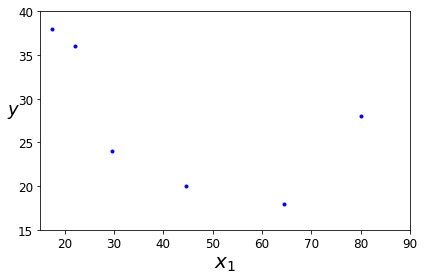

In [21]:
print("b. Solution: \n")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([15, 90, 15, 40])
save_fig("generated_data_plot")
plt.show()

In [22]:
print("c. Solution: \n")
X_b = np.c_[np.ones((6, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta_best: ", theta_best)
print("ŷ = a + bx form: ")
print("y = ",theta_best[0],"+","(",theta_best[1],")x")

c. Solution: 

theta_best:  [35.58180453 -0.19182491]
ŷ = a + bx form: 
y =  35.58180452741122 + ( -0.1918249114901835 )x


d. Solution: 

y_predict for x = 40 is: 27.908808067803882
y_predict for x = 60 is: 24.072309838000212

Plotting complete graph: 

y_complete_predict:  [35.58180453 18.31756249]
Saving figure linear_model_predictions


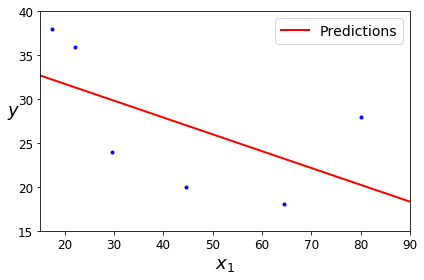

In [23]:
print("d. Solution: \n")
X_new = np.array([[40], [60]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("y_predict for x =", X_new[0][0], "is:", y_predict[0])
print("y_predict for x =", X_new[1][0], "is:", y_predict[1])
print("\nPlotting complete graph: \n")
X_complete = np.array([[0],[90]])
X_complete_b = np.c_[np.ones((2, 1)), X_complete]
y_complete_predict = X_complete_b.dot(theta_best)
print("y_complete_predict: ", y_complete_predict)
plt.plot(X_complete, y_complete_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.axis([15, 90, 15, 40])
save_fig("linear_model_predictions")
plt.show()

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression

print("f. Solution: \n")
print("Method 1: \n")
X_df = pd.DataFrame(np.array(X).reshape(-1,1))
print("X_df: ", X_df)
lin_reg = LinearRegression()
lin_reg.fit(X_df, y)
print("\nintercept: ", lin_reg.intercept_)
print("coefficient: " , lin_reg.coef_)
print("y_lr_predict: ", lin_reg.predict(X_new))
cc_xy = np.corrcoef(X,y)
print("correlation coefficient (Pearson's r): ", cc_xy)

f. Solution: 

Method 1: 

X_df:        0
0  17.5
1  22.0
2  29.5
3  44.5
4  64.5
5  80.0

intercept:  35.58180452741122
coefficient:  [-0.19182491]
y_lr_predict:  [27.90880807 24.07230984]
correlation coefficient (Pearson's r):  [[ 1.         -0.57874371]
 [-0.57874371  1.        ]]


In [25]:
from scipy import stats

print("\nMethod 2: \n")
lin_reg = stats.linregress(X, y)
print("correlation coefficient (Pearson's r): ", r_value)
print("determination coefficient (r^2): ", r_value**2)
print("population correlation coefficient (p): ", p_value)


Method 2: 

correlation coefficient (Pearson's r):  -0.5787437075660629
determination coefficient (r^2):  0.3349442790473125
population correlation coefficient (p):  0.22880788559284737
